In [0]:
# Current stable release for CPU and GPU
# !pip install tensorflow 

In [113]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__) 

2.0.0-rc0


In [114]:
mnist = keras.datasets.mnist
type(mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [115]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
X_train.shape, X_test.shape 

((60000, 28, 28), (10000, 28, 28))

In [0]:
X_train = X_train/255
X_test = X_test/255

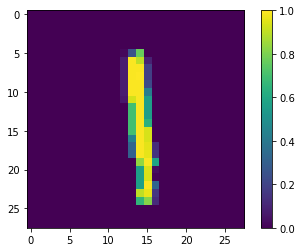

In [117]:
plt.figure()
plt.imshow(X_train[8])
plt.colorbar() 

**Build the model with TF 2.0**

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD 

**MLP with 2 hidden layer neural network**

In [0]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(485, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(114, activation = 'relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization()) 
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [0]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # model compilation

In [121]:
history= model.fit(X_train, y_train, batch_size= 1000, epochs = 10, verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 32us/sample - loss: 0.7596 - accuracy: 0.7689 - val_loss: 0.7178 - val_accuracy: 0.8770
Epoch 2/10
48000/48000 [==============================] - 1s 13us/sample - loss: 0.3222 - accuracy: 0.9030 - val_loss: 0.5203 - val_accuracy: 0.9162
Epoch 3/10
48000/48000 [==============================] - 1s 13us/sample - loss: 0.2480 - accuracy: 0.9261 - val_loss: 0.3607 - val_accuracy: 0.9392
Epoch 4/10
48000/48000 [==============================] - 1s 13us/sample - loss: 0.2064 - accuracy: 0.9389 - val_loss: 0.2433 - val_accuracy: 0.9530
Epoch 5/10
48000/48000 [==============================] - 1s 12us/sample - loss: 0.1786 - accuracy: 0.9457 - val_loss: 0.1661 - val_accuracy: 0.9638
Epoch 6/10
48000/48000 [==============================] - 1s 12us/sample - loss: 0.1561 - accuracy: 0.9531 - val_loss: 0.1294 - val_accuracy: 0.9681
Epoch 7/10
48000/48000 [==============================] 

In [122]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test) 
accuracy_score(y_test, y_pred)

0.9761

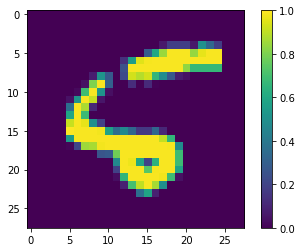

In [123]:
plt.figure()
plt.imshow(X_test[8])
plt.colorbar()

In [124]:
pred[8]

array([1.0972712e-03, 8.9199435e-05, 3.1207313e-03, 2.6691129e-04,
       3.7174627e-02, 1.7208841e-01, 7.8200525e-01, 9.8253659e-05,
       2.5282262e-03, 1.5311328e-03], dtype=float32)

In [125]:
pred = model.predict(X_test)
np.argmax(pred[8]) 

6

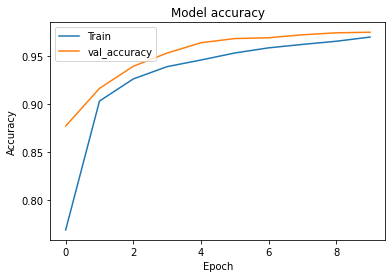

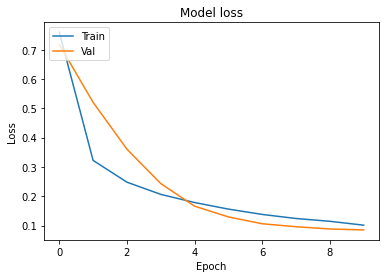

In [126]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val_accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

**Plot Confusion matrix**

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ae6a95cf8>)

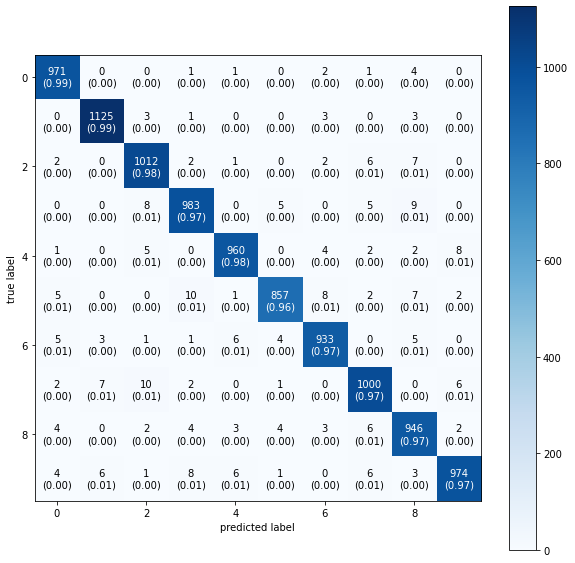

In [127]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(10,10),colorbar= True ,show_normed= True)

**MLP with 3 hidden layer neural network**

In [0]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(485, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(300, activation ='relu',kernel_initializer='he_uniform')) 
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(114, activation = 'relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization()) 
model.add(Dropout(0.5)) 
model.add(Dense(10, activation = 'softmax'))

In [0]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # model compilation

In [130]:
history= model.fit(X_train, y_train, batch_size= 1000, epochs = 10, verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 43us/sample - loss: 1.0530 - accuracy: 0.6779 - val_loss: 0.5970 - val_accuracy: 0.8574
Epoch 2/10
48000/48000 [==============================] - 1s 16us/sample - loss: 0.4105 - accuracy: 0.8766 - val_loss: 0.4178 - val_accuracy: 0.8865
Epoch 3/10
48000/48000 [==============================] - 1s 16us/sample - loss: 0.3026 - accuracy: 0.9109 - val_loss: 0.2883 - val_accuracy: 0.9180
Epoch 4/10
48000/48000 [==============================] - 1s 16us/sample - loss: 0.2543 - accuracy: 0.9258 - val_loss: 0.1998 - val_accuracy: 0.9444
Epoch 5/10
48000/48000 [==============================] - 1s 16us/sample - loss: 0.2115 - accuracy: 0.9394 - val_loss: 0.1615 - val_accuracy: 0.9519
Epoch 6/10
48000/48000 [==============================] - 1s 16us/sample - loss: 0.1839 - accuracy: 0.9463 - val_loss: 0.1359 - val_accuracy: 0.9591
Epoch 7/10
48000/48000 [==============================] 

In [131]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test) 
accuracy_score(y_test, y_pred) 

0.9741

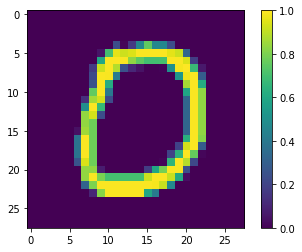

In [132]:
plt.figure()
plt.imshow(X_test[10])
plt.colorbar()

In [133]:
pred = model.predict(X_test)
np.argmax(pred[10])

0

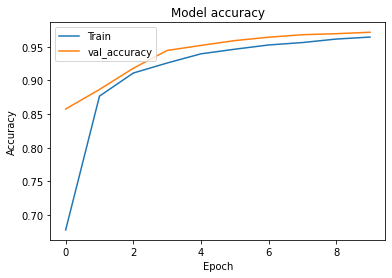

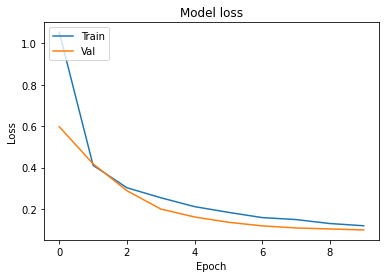

In [134]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val_accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

**Plot Confusion matrix**

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6aec52e860>)

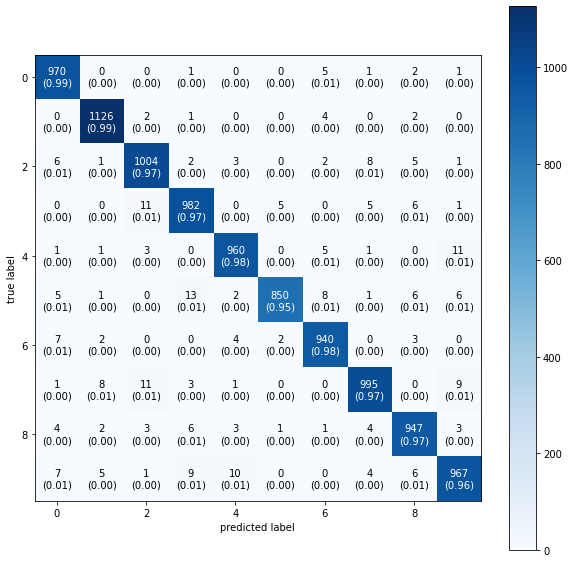

In [135]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(10,10),colorbar= True ,show_normed= True)

**MLP with 5 hidden layer neural network**

In [0]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(485, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(300, activation ='relu',kernel_initializer='he_uniform')) 
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(185, activation = 'relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization()) 
model.add(Dropout(0.5))
model.add(Dense(114, activation ='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(70, activation = 'relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5)) 
model.add(Dense(10, activation = 'softmax'))

**model compilation**

In [0]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # model compilation

In [138]:
history= model.fit(X_train, y_train, batch_size= 1000, epochs = 10, verbose=1,validation_split=0.2) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 65us/sample - loss: 2.2209 - accuracy: 0.3098 - val_loss: 1.0625 - val_accuracy: 0.7232
Epoch 2/10
48000/48000 [==============================] - 1s 20us/sample - loss: 1.0458 - accuracy: 0.6489 - val_loss: 0.5560 - val_accuracy: 0.8557
Epoch 3/10
48000/48000 [==============================] - 1s 20us/sample - loss: 0.6808 - accuracy: 0.7875 - val_loss: 0.3776 - val_accuracy: 0.8852
Epoch 4/10
48000/48000 [==============================] - 1s 20us/sample - loss: 0.5156 - accuracy: 0.8508 - val_loss: 0.2627 - val_accuracy: 0.9218
Epoch 5/10
48000/48000 [==============================] - 1s 20us/sample - loss: 0.4117 - accuracy: 0.8860 - val_loss: 0.2182 - val_accuracy: 0.9347
Epoch 6/10
48000/48000 [==============================] - 1s 20us/sample - loss: 0.3442 - accuracy: 0.9079 - val_loss: 0.1822 - val_accuracy: 0.9475
Epoch 7/10
48000/48000 [==============================] 

In [139]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test) 
accuracy_score(y_test, y_pred) 

0.9642

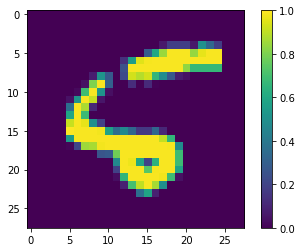

In [140]:
plt.figure()
plt.imshow(X_test[8])
plt.colorbar() 

In [141]:
pred[8]

array([1.4611089e-03, 7.5431855e-04, 3.3863389e-03, 1.1082267e-04,
       1.5243679e-02, 3.5240415e-02, 9.3207055e-01, 4.3770415e-05,
       1.0722195e-02, 9.6682785e-04], dtype=float32)

In [142]:
pred = model.predict(X_test)
np.argmax(pred[8]) 

5

**Plotting Learning Curve**

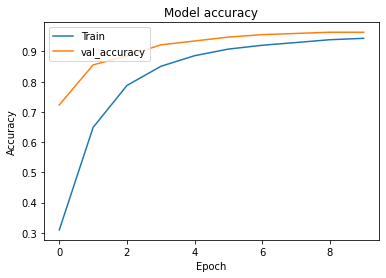

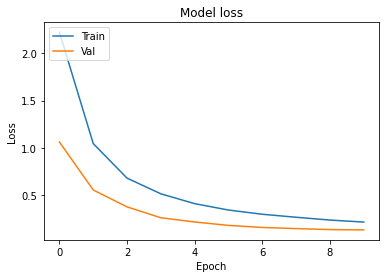

In [143]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val_accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

**Plot Confusion matrix**

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ae722cb38>)

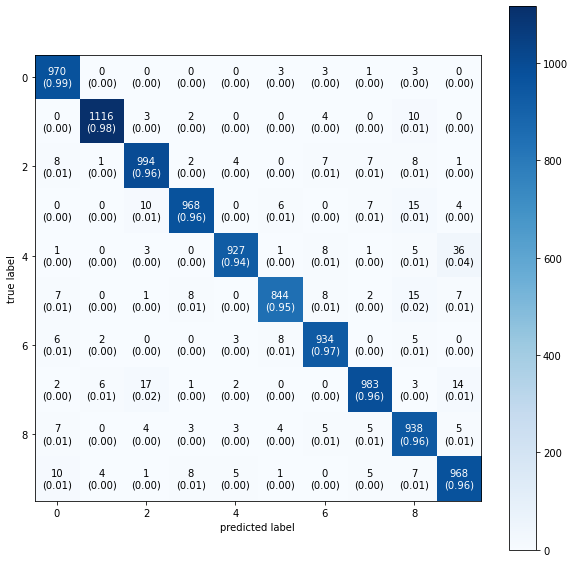

In [145]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(10,10),colorbar= True ,show_normed= True)

**Result**

In [146]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Sr.No","MODEL","Activation","Hidden_layer",'Train','Test']
x.add_row(["1", 'MLP', "relu",5,0.9636,0.9642]) 
x.add_row(["2", 'MLP', "relu",3,0.9715,0.9741]) 
x.add_row(["3", 'MLP', "relu",2,0.9747,0.9761]) 
print(x) 

+-------+-------+------------+--------------+--------+--------+
| Sr.No | MODEL | Activation | Hidden_layer | Train  |  Test  |
+-------+-------+------------+--------------+--------+--------+
|   1   |  MLP  |    relu    |      5       | 0.9636 | 0.9642 |
|   2   |  MLP  |    relu    |      3       | 0.9715 | 0.9741 |
|   3   |  MLP  |    relu    |      2       | 0.9747 | 0.9761 |
+-------+-------+------------+--------------+--------+--------+
